# Numerical interpolation

## Generalized polynomial interpolation

<font size="4">$$\phi = \sum_{k = 0}^{n} c_k\phi_k$$</font>

$\begin{bmatrix} 
\phi_0(x_0) & \phi_1(x_0) & ... & \phi_n(x_0)\\ 
\phi_0(x_1) & \phi_1(x_1) & ... & ...        \\ 
...         & ...         & ... & ...        \\
\phi_0(x_n) & \phi_1(x_n) & ... & \phi_n(x_n)\\
\end{bmatrix}
\begin{bmatrix}
c_0\\
c_1\\
...\\
c_n\\
\end{bmatrix}
\;\;=\;\;
\begin{bmatrix}
f(x_0)\\
f(x_1)\\
...   \\
f(x_n)\\
\end{bmatrix}
$


# Algebraic interpolation polynomials, or Matrix Vandermont

$\begin{bmatrix} 
1   & x_0 & ... & x_0^n\\ 
1   & x_1 & ... & x_1^n\\ 
... & ... & ... & ...  \\
1   & x_n & ... & x_n^n\\
\end{bmatrix}
\begin{bmatrix}
c_0\\
c_1\\
...\\
c_n\\
\end{bmatrix}
\;\;=\;\;
\begin{bmatrix}
f(x_0)\\
f(x_1)\\
...   \\
f(x_n)\\
\end{bmatrix}
$

<font size="3">Vandermonde matrix is the easiest way to solve the interpolation problem. Many libraries have this mathod. for example: ```numpy.polyfit```</font>

<font size="3">This is a bad method for constructing an interpolation term due to high condition number __Vandermonde matrix__</font>
<font size="3"></font>


In [4]:
import numpy as np
n = 100
x = np.linspace(0, 1, n)
A = np.vander(x, increasing = 'True')
print('cond_2(A) = {0:7.3e}'.format(np.linalg.cond(A)))
c = np.random.rand(n)
b = np.dot(A, c)
c_ = np.linalg.solve(A, b)
print('||c - c_|| = {0:7.3}'.
      format( np.linalg.norm(c - c_, ord = np.inf)))

cond_2(A) = 6.083e+19
||c - c_|| = 3.57e+02


#### How can you see condition number __very high__ and we have only 100 elements. Due to if input data have error (even small). We can't find polynomial

/home/arlik_null/Документы/GitHub/MathCalc/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


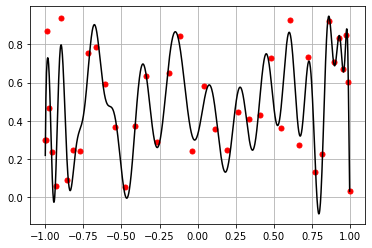

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

n = 40
# Задаём узлы
x = np.cos(np.pi * np.linspace(-1,0., n+1, 
                               endpoint=False))
x = np.sort(x)
# Случайные значения в узлах
y = np.random.rand(n+1)
#
p = np.polyfit(x, y, n)
xx = np.linspace(np.min(x),np.max(x), 1000)
yy = np.polyval(p, xx)
plt.plot(x,y,'ro', ms = 5)
plt.plot(xx, yy,'k-')
plt.grid(True)

So we use anoter methods for this

# Interpolation polynomial in Lagrange form

## $$L_n(x_i) = \sum_{j = 0}^{n} f(x_j)l_j(x)$$

>### ${x_0, x_1, \cdots, x_n} - points where the function is given f(x)$
>
>### $l_i(x_j) = \begin{cases} 1, & i = j\\0, & i \neq j\\\end{cases}$
>
> or anoter 
>
>### $l_j(x) = \prod_{k = 0, k \neq j}^{n} \frac{x - x_k}{x_j - x_k} = \frac{\prod_{k = 0}^{n}(x - x_k)}{(x - x_j)\prod_{k = 0, k \neq j}^{n} (x_j - x_k)}$


In [6]:
import HelpFunc as hlp
def Lagr(y, x):
    n = len(x)
    
    def func(points):
        
        L = np.zeros_like(points)
        
        for num in range(len(points)):
            
            p = points[num]
            
            for j in range(n):
                l = 1.
                for k in range(n):
                    if (k == j):
                        continue
                    l *= (p - x[k])/(x[j] - x[k])     

                L[num] += y[j] * l
        
        return L
    
    return func

In [7]:
start = -np.pi
end   = np.pi
n     = 10
f     = lambda x: np.sin(x)

x = np.linspace(start, end, n)
y = f(x)
Lag = Lagr(y, x)

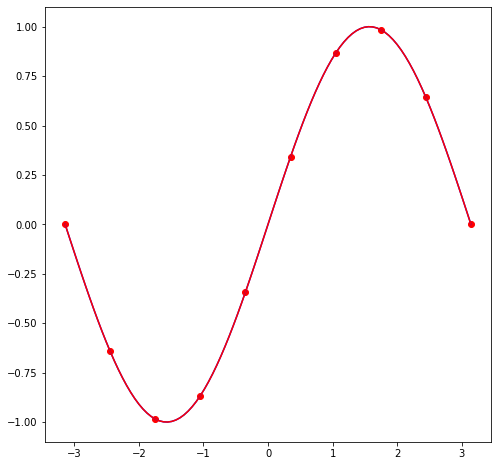

In [8]:
xx = np.linspace(start, end, 100)
yy = f(xx)
yl = Lag(xx)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.plot(x, y, 'ro')
ax.plot(xx, yy, 'b')
ax.plot(xx, yl, 'r')
plt.show()

### But how do we know if our model is performing well? Graphs are certainly good, but a more accurate method is needed.

# Grade of Interpolation error for Lagrange polyonmial and Nuton

### $$f(x) - L_n(x) = \frac{f^{n + 1}(\xi(x))}{(n + 1)!}\omega(x),\;\;\;\; \omega(x) = \prod_{k=0}^{n}(x - x_k)$$
#### But if are used Divided differences:
>### $f(x_0\;;\; \cdots\;;\; x_k) = \frac{f(x_1\;;\; \cdots\;;\; x_k) - f(x_0\;;\; \cdots\;;\; x_{k - 1})}{x_k - x_0}$
> or
>### $f(x_0\;;\; \cdots\;;\; x_k) = \sum_{j = 0}^{k}\frac{f(x_j)}{\prod_{i=0, i \neq j}^{k}(x_j - x_i)}$

### $$f(x) - L_n(x) = f(x_0\;;\; \cdots\;;\; x_{n+1})\omega(x),\;\;\;\; \omega(x) = \prod_{k=0}^{n}(x - x_k)$$

## Then we calulate $L_n$ I think we can use $||.||_{C[a, b]}$ ($||.||_{C[a, b]} = \max_i{|.|}$)

In [9]:
def calc_div_differ(y, x, eps = 1e-15):
    # print(x)
    dd = 0.
    k = len(x)
    for j in range(k):
        den = 1.
        
        for i in range(k):
            if (i != j):
                den *= (x[j] - x[i])
                
        if(np.abs(den) < eps):
            return np.inf
        
        dd += y[j] / den
        
    return dd    
        
# y and x  - points which be interpolate
# y_points and points - points which err is calculated
def ERR_Lagrange(y_points, points, y, x):
    k = len(x)
    n = len(points)
    
    err = np.zeros_like(y_points)
    
    for num in range(n):
        p  = points[num]
        yp = y_points[num]
        
        x_elems = np.append(x, p)
        y_elems = np.append(y, yp)
        
        div_diff = calc_div_differ(y_elems, x_elems)
        # print(div_diff)
        omega    = 1
        for i in range(k):
            omega *= (p - x[i])
        
        err[num] = div_diff*omega
    return err    
            

In [10]:
start = -np.pi
end   = np.pi
n     = 10
f     = lambda x: np.sin(x)
x = np.linspace(start, end, n)
y = f(x)
Lag = Lagr(y, x)

/tmp/ipykernel_2123/32876909.py:40: RuntimeWarning: invalid value encountered in double_scalars
  err[num] = div_diff*omega


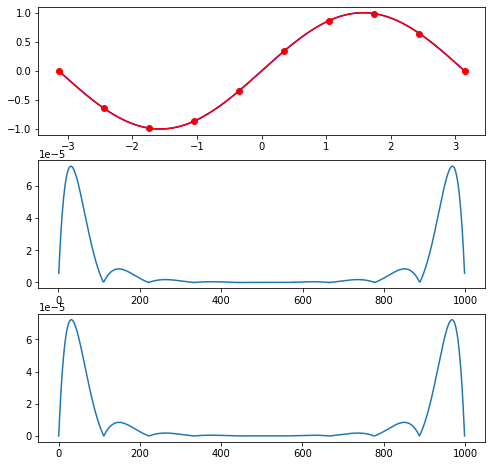

In [11]:
xx = np.linspace(start, end, 1000)
yy = f(xx)
yl = Lag(xx)

fig, ax = plt.subplots(3, 1, figsize=(8, 8))

ax[0].plot(x, y, 'ro')
ax[0].plot(xx, yy, 'b', label = '')
ax[0].plot(xx, yl, 'r')

pred_err = ERR_Lagrange(yy, xx, y, x)
ax[1].plot(np.abs(pred_err))

real_err = yy - yl

ax[2].plot(np.abs(real_err))

plt.show()

We predict error True

# Newton's form 

## $$L_n = f(x_0) + f(x_0;x_1)(x - x_0) + \cdots + f(x_0; x_1 ;\cdots; x_n)(x - x_0) \cdots (x - x_n - 1)$$

## Very useful use Matrix with divided difference for calculate it

$$
\begin{bmatrix}
f(x_0) & 0          & \cdots         & 0      \\
f(x_1) & f(x_0;x_1) & \cdots         & \cdots \\
f(x_2) & f(x_1;x_2) & f(x_0;x_1;x_2) & \cdots \\
\cdots & \cdots     & \cdots         & \cdots \\
\end{bmatrix}
$$


In [12]:
def Newton(y, x, eps=1e-15):
    
    n = len(x)
    
    DD = np.zeros((n, n))
    
    DD[:, 0] = y
    for j in range(1, n):
        for i in range(j, n):
            DD[i, j] = (DD[i, j - 1] - DD[i - 1, j - 1]) / (x[i] - x[i - j])
    
    # print(DD)
    
    def func(points):
        
        L = np.zeros_like(points)
        
        for num in range(len(points)):
            
            p = points[num]
            
            vector = np.zeros_like(x)
            vector[0] = 1
            
            for i in range(1, n):
                vector[i] = vector[i - 1]*(p - x[i - 1])
            
        
            for i in range(0, n):
                L[num] +=  DD[i, i] * vector[i]
        return L        
    
    return func

In [13]:
start = -np.pi
end   = np.pi
n     = 10
f     = lambda x: np.sin(x)
x = np.linspace(start, end, n)
y = f(x)
New = Newton(y, x)

/tmp/ipykernel_2123/32876909.py:40: RuntimeWarning: invalid value encountered in double_scalars
  err[num] = div_diff*omega


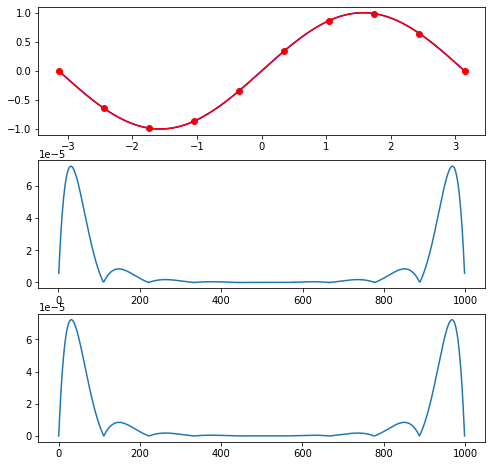

In [14]:
xx = np.linspace(start, end, 1000)
yy = f(xx)
yl = New(xx)

fig, ax = plt.subplots(3, 1, figsize=(8, 8))

ax[0].plot(x, y, 'ro')
ax[0].plot(xx, yy, 'b', label = '')
ax[0].plot(xx, yl, 'r')

pred_err = ERR_Lagrange(yy, xx, y, x)
ax[1].plot(np.abs(pred_err))

real_err = yy - yl

ax[2].plot(np.abs(real_err))

plt.show()

### How can you see in end of interval error intrease. Why? I don't know lol

### So that at the end of the segment there is no burst of error, and in general, to reduce the maximum error, you can use the Chebyshev polynomials 

# Grade of Own error(Another one) 

### $$|f(x) - L_n(x)| = |\frac{f^{n + 1}(\xi(x))}{(n + 1)!}\omega(x)| \leq \frac{M_{n+1}}{(n + 1)!} \max_{[a, b]}|\prod_{k=0}^{n} (x - x_k)|$$

># For minimalizate we must solve optimization task 
> 
>## $\min_{\{x_0, \cdots , x_n\} \subset [a, b]}\max_{[a, b]}|\prod_{k=0}^{n} (x - x_k)|$ 


# Chebyshev polynomials

### It solve optimization task above

## $$T_n(t) = cos(arccos(t)), t \in [-1, 1]$$

## Polynomial Roots

## $$t_{nj} = cos(\frac{\pi}{2n} + \frac{\pi}{n}j)$$

## Chbyshev polynomials look like

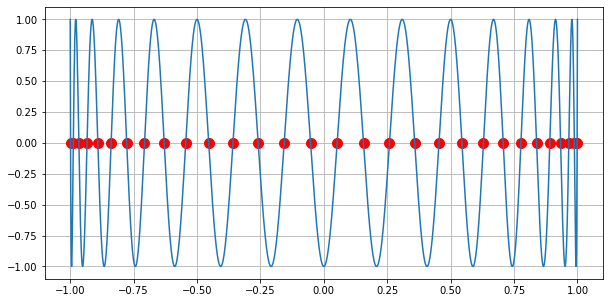

In [15]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
n = 30
j = np.arange(n)
tn = np.cos(np.pi/(2*n) + np.pi * j / n)
xx = np.linspace(-1,1,4000)
fig, ax = plt.subplots(figsize = (10,5))
plt.plot(tn, np.zeros(n), 'ro', ms = 10)
plt.plot(xx, np.cos(n * np.arccos(xx)))
plt.grid(True)

## As we can see on the sides, the root density is high. Most likely this is a property and reduces the intrapation error at the edges. 

## For example, Function on which interpolation on a uniform grid diverges

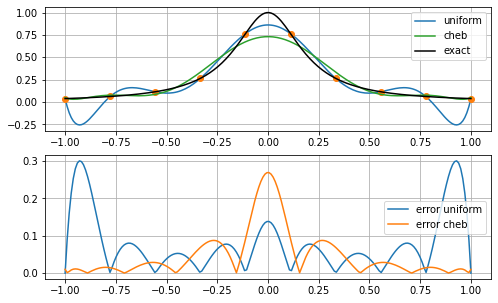

In [16]:
%matplotlib inline
from scipy.interpolate import BarycentricInterpolator
import numpy as np
from matplotlib import pyplot as plt


f = lambda x: 1/(25*x**2 + 1)
x = np.linspace(-1, 1, 200)
n = 10 # 5,20
# uniform
xi = np.linspace(-1, 1, n)
yi = f(xi)
Ln = BarycentricInterpolator(xi,yi)
y = Ln(x)
# Chebyshev
j = np.arange(n)
xic = np.cos(np.pi/(2*n) + np.pi * j / n)
yic = f(xic)
Lnc = BarycentricInterpolator(xic, yic)
yc = Lnc(x)

#
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8,5) )
ax1.plot(x, y, label = 'uniform')
ax1.plot(xi, yi,'o')
ax1.plot(x, yc, label = 'cheb')
ax1.plot(x, f(x),'k-', label = 'exact')
ax1.legend()
ax1.grid(True)

ax2.plot(x, np.abs(f(x) - y), label = 'error uniform')
ax2.plot(x, np.abs(f(x) - yc), label = 'error cheb')
ax2.legend()
ax2.grid(True)

When we use n = 20 error very high 

Use Chebyhev for my func

In [17]:
n = 10
start = -1
end = 1

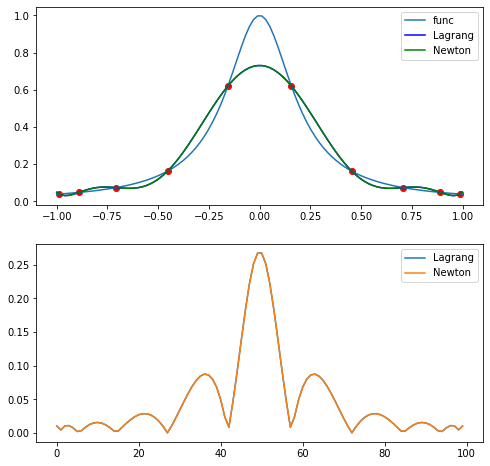

In [18]:
j = np.arange(n)
tn = np.cos(np.pi/(2*n) + np.pi * j / n)
y  = f(tn)
Lag = Lagr(y, tn)
New = Newton(y, tn)

xx = np.linspace(start, end, 100)

yy = f(xx)
yl = Lag(xx)
yn = New(xx)

fig, ax = plt.subplots(2, 1, figsize=(8,8))

ax[0].plot(tn, y, 'ro')
ax[0].plot(xx, yy, label='func')
ax[0].plot(xx, yl, 'b', label='Lagrang')
ax[0].plot(xx, yn, 'g', label='Newton')
ax[0].legend()

err_lagrc = np.abs(yy - yl)
err_newtonc = np.abs(yy - yn)

ax[1].plot(err_lagrc, label='Lagrang')
ax[1].plot(err_newtonc, label='Newton')
ax[1].legend()

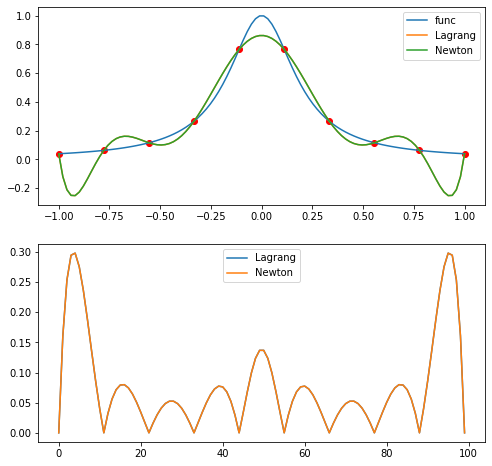

In [19]:
x = np.linspace(start, end, n)
y = f(x)
Lag = Lagr(y, x)
New = Newton(y, x)


xx = np.linspace(start, end, 100)
yy = f(xx)
yl = Lag(xx)
yn = New(xx)

fig, ax = plt.subplots(2, 1, figsize=(8,8))

ax[0].plot(x, y, 'ro')
ax[0].plot(xx, yy, label='func')
ax[0].plot(xx, yl, label='Lagrang')
ax[0].plot(xx, yn, label='Newton')
ax[0].legend()

err_lagr = np.abs(yy - yl)
err_newton = np.abs(yy - yn)

ax[1].plot(err_lagr, label='Lagrang')
ax[1].plot(err_newton, label='Newton')
ax[1].legend()

And compare two errors

In [20]:
print("error lagrand cheb: {}, error Newton cheb: {}".format(np.max(err_lagrc), np.max(err_newtonc)))
print("error lagrand:      {}, error Newton:      {}".format(np.max(err_lagr), np.max(err_newton)))

error lagrand cheb: 0.2671248657196852, error Newton cheb: 0.2671248657196855
error lagrand:      0.29797154015144345, error Newton:      0.29797154015144056


# Cubic Spline

## We want build polynoms like there:
## $$S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3$$

>### With another one condition:
>
>### $S_i(x_{i-1}) = S_{i-1}(x_{i - 1}))$
>### $S_i^{'}(x_{i-1}) = S_{i-1}^{'}(x_{i - 1}))$
>### $S_i^{''}(x_{i-1}) = S_{i-1}^{''}(x_{i - 1}))$

### From this we get caef(poluchaem caef pasanchicki 5 utra a ia delau ebuchie Math Calc chtobi ne otchislitsa nachui)

>### $a_i = f(x_i)$
>### $d_i = \frac {c_i - c_{i-1}}{3h_i}$
>### $b_i = \frac {(a_i - a_{i-1})}{h_i} - \frac{2c_i + c_{i - 1}}{3}h_i$
>### $c_{i-1}h_i + 2c_i(h_i + h_{i+1}) + c_{i+1}h_{i+1} = 3(\frac{a_{i + 1} - a_i}{h_{i + 1}} - \frac{a_i - a_{i - 1}}{h_i}) = \rho$
>> $h_k = x_k - x_{k - 1}$



### It good coef, but i want solve this task more genius method

#### We can find $c_i$ in this matrix:

$$T
\begin{bmatrix}
c_1\\
\cdots\\
c_{n-1}\\
\end{bmatrix}
=
\begin{bmatrix}
\rho_1\\
\cdots\\
\rho_{n-1}\\
\end{bmatrix}$$

$$
T = 
\begin{bmatrix}
2(h_1 + h_2) &    h_2       & 0        & \cdots\\ 
h2           & 2(h_2 + h_3) & h_3      & \cdots\\
\cdots       & \cdots       & \cdots   & \cdots\\
\cdots       & \cdots       & h_{n-1}  & 2(h_{n - 1} + h_n)\\
\end{bmatrix}
$$

#### And we have func for slove this,(LAB_2, SLAE)


In [21]:
from scipy.sparse import diags
def Cubic_spline(y, x):
    n = len(x)
    
    a = np.copy(y)
    a = np.append(a, a[n-1])
    
    h = np.zeros(n + 1)
    for i in range(1, n + 1):
        h[i] = x[i] - x[i - 1]
    h[0] = 0
    h[n] = h[n - 1]
    
    
    
    rho = np.zeros(n)
    rho[0] = 0
    for i in range(1, n):
        rho[i] = 3((a[i + 1] - a[i])/h[i + 1] - (a[i] - a[i - 1])/h[i])
    
    
    T = diags([h[2:n], [2*(h[i] + h[i + 1]) for i in range(1, n)], h[2:n]], [-1, 0, 1]).toarray()
    
    c = hlp.sweep(T, rho[0:n-1])
    
    #from boundary conditions    
    
    b = np.zeros(n)
    for i in range(1, n):
        b[i] = (a[i] - a[i-1])/h[i] - ((2*c[i] + c[i-1])*h[i])/3
        
    d = np.zeros(n)
    for i in range(1, n):
        d[i] = (c[i] - c[i - 1])/(3 * h[i])
        
    def func(points):
        S = np.zeros(n)
        
        for k in range(len(points)):
            S[k] = 
    
    return func

SyntaxError: invalid syntax (1071451769.py, line 40)

In [102]:
def calculate_spline (y, x):
    # natural cubic splines: f'' (ends) == 0
    # si = fi + bi * (x - xi) + ci * (x - xi)^2 + di * (x - xi)^3
    #<calculate coefficients>
    x_num = len(x)
    
    a = np.empty (x_num - 1)
    a[0] = 0 #not used
    
    c = np.empty (x_num)
    
    l = np.empty (x_num)
    l[0] = 1
    
    m = np.empty (x_num)
    m[0] = 0
    
    z = np.empty (x_num)
    z[0] = 0
    
    for i in range (1, x_num - 1):
        a[i] = (3 * (y[i + 1] - y[i]) / (x[i + 1] - x[i]) - 3 * (y[i] - y[i - 1]) / (x[i] - x[i - 1]))
        l[i] = (2 * (x[i + 1] - x[i - 1]) - (x[i] - x[i - 1]) * m[i - 1])
        m[i] = ((x[i + 1] - x[i]) / l[i])
        z[i] = ((a[i] - (x[i] - x[i - 1]) * z[i]) / l[i])
        
    l[x_num - 1] = 1
    z[x_num - 1] = 0
    c[x_num - 1] = 0
    
    b = np.empty (x_num - 1)
    d = np.empty (x_num - 1)
    
    for i in range (x_num - 2, -1, -1):
        c[i] = z[i] - m[i] * c[i + 1]
        b[i] = (y[i + 1] - y[i]) / (x[i + 1] - x[i]) - (x[i + 1] - x[i]) * (c[i + 1] + 2 * c[i]) / 3
        d[i] = (c[i + 1] - c[i]) / 3 / (x[i + 1] - x[i])
    
    
    S = np.zeros(x_num)
    
        
    def func(points):
        
        
        f = np.zeros(len(points))
        for i in range(len(points)):
            
            p = points[i]
            S = np.zeros(x_num)
            
            for j in range(0, n):
                if x[j] <= p and x[j + 1] >= p:
                    f[i] = y[j] + b[j]*(p - x[j]) + c[j]*((p - x[j])**2) + d[j]*((p - x[j])**3)
                    break
        return f
    return func
    

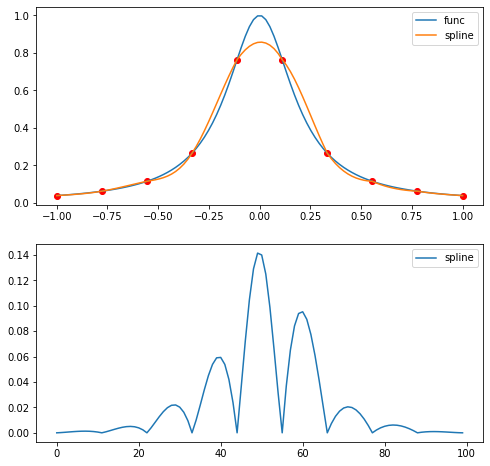

In [122]:
n = 10
start = -1
end = 1
x = np.linspace(start, end, n)
y = f(x)
spline = calculate_spline(y, x)


xx = np.linspace(start, end, 100)
yy = f(xx)
ys = spline(xx)

fig, ax = plt.subplots(2, 1, figsize=(8,8))

ax[0].plot(x, y, 'ro')
ax[0].plot(xx, yy, label='func')
ax[0].plot(xx, ys, label='spline')
ax[0].legend()

err_spline = np.abs(yy - ys)

ax[1].plot(err_spline, label='spline')
ax[1].legend()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])